![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

**Load and Inspect Netflix Data**

In [28]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

#read in netflix csv file
netflix_df = pd.read_csv('netflix_data.csv')

**Subset the DataFrame for Movies**

In [36]:
#filter out TV_Shows as they are not in the analysis scope
    # using netflix_df['type'] shows there are two types 'Movie' and 'TV Show'

netflix_subset = netflix_df[netflix_df['type'] == 'Movie']

In [30]:
netflix_subset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'duration', 'description', 'genre'],
      dtype='object')

In [38]:
#check that netflix subset only has Movie type
assert (netflix_subset['type'] == 'Movie').all(), "Not all values in 'type' are 'TV Shows'"

In [39]:
netflix_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5377 non-null   object
 1   type          5377 non-null   object
 2   title         5377 non-null   object
 3   director      5214 non-null   object
 4   cast          4951 non-null   object
 5   country       5147 non-null   object
 6   date_added    5377 non-null   object
 7   release_year  5377 non-null   int64 
 8   duration      5377 non-null   int64 
 9   description   5377 non-null   object
 10  genre         5377 non-null   object
dtypes: int64(2), object(9)
memory usage: 504.1+ KB


**Subset the columns of the new DataFrame**

In [40]:
#now, pick columns most relevant to your analysis
columns_ = ['title', 'country', 'genre', 'release_year', 'duration']
netflix_movies = netflix_subset[columns_]

In [41]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5377 entries, 1 to 7786
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         5377 non-null   object
 1   country       5147 non-null   object
 2   genre         5377 non-null   object
 3   release_year  5377 non-null   int64 
 4   duration      5377 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 252.0+ KB


**Filter the DataFrame by Movie Duration**

In [43]:
#filter out movies longer than 60 mins
short_movies = netflix_movies[netflix_movies.duration < 60 ]

**Assign colours to movie genres**

In [44]:
#initialise an empty colours list
colors = []

In [20]:
#iterate through the rows of netflix_movies
for label,row in netflix_movies.iterrows() :
    if row['genre'] == 'Children' :
        colors.append('blue')
    elif row['genre'] == 'Documentaries' :
        colors.append('red')
    elif row['genre'] == 'Stand-Up' :
        colors.append('black')
    else:
        colors.append('green')

NameError: name 'black' is not defined

In [21]:
#check list
colors[:6]

[]

**Plot the movie duration by year using colors**

In [25]:
#initialise new figure
fig = plt.figure(figsize=(12,7))

<Figure size 1200x700 with 0 Axes>

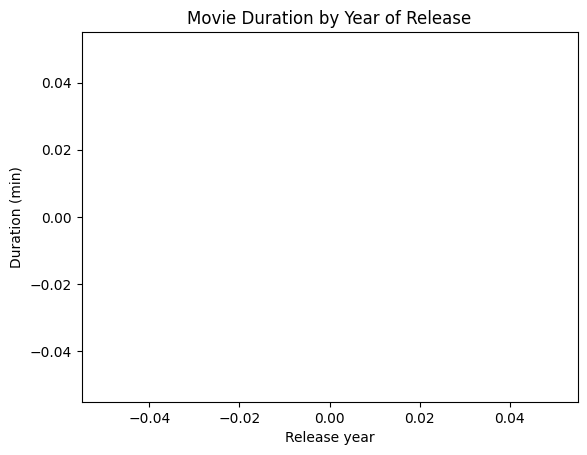

In [26]:
# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies.release_year, netflix_movies.duration, c=colors)
plt.title("Movie Duration by Year of Release")
plt.xlabel("Release year")
plt.ylabel("Duration (min)")
plt.show()

In [27]:
# Are we certain that movies are getting shorter?
answer = "maybe"